a, 
The natural frequency of x1 can be calculate from the fact that f1 = 1/T Hz= 1/0.01 Hz= 100Hz where T is . The natural frequency of x2 is given in the instruction as f2 = 1000 Hz.

The angular frequency describes the total angle rotated in one second.  Thus the Angular frequency in radians is given by 2= 2*pi * natural frequency. From this we obtain that
w1 = 2*pi* 100 = 200*pi
w2 = 2*pi* 1000 = 2000*pi


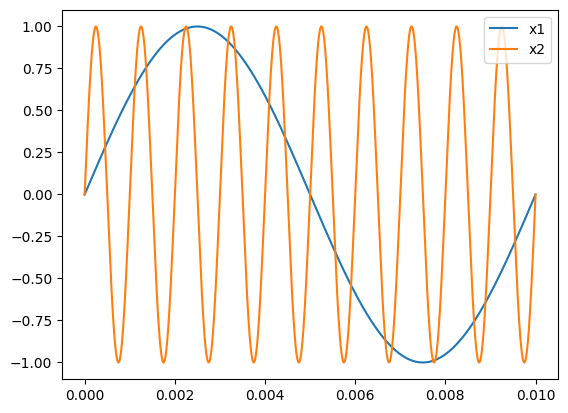

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sounddevice as sd


# Generate a time vector ’t’
deltaT = 0.00001
t = np.arange(0, 0.010+deltaT, deltaT)
#Refer to natural frequency in book
#Know that plot of sine wave is given by y= A*sin(t * 2*np.pi * freq+offset)
#Natural frequency for first signal is 0.01s => freq = 1/period which gives below
x1 = np.sin(t*2*np.pi*1/0.01)
x2 = np.sin(t*2*np.pi*1000)

plt.plot(t,x1, label = "x1")
plt.plot(t,x2, label="x2")
plt.legend()
plt.show()




In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sounddevice as sd
deltaT = 0.00001
t = np.arange(0, 5+deltaT, deltaT)
x1 = np.sin(t*2*np.pi*1/0.01)
x2 = np.sin(t*2*np.pi*1000)

sd.play(x1,1/deltaT, blocking=True)
sd.play(x2,1/deltaT, blocking=True)


1c, Vi tycker signalerna låter

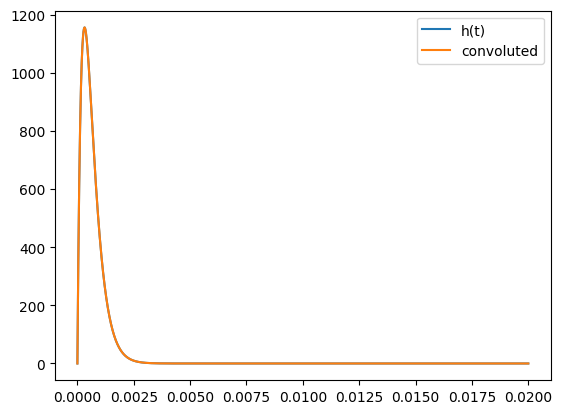

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import sounddevice as sd
def u(t):
    return 1*(t>=0)
deltaT = 0.00001
t = np.arange(0, 0.020+deltaT, deltaT)
alpha = np.pi*1000
#In the book, the function is given as h(t) = alpha^2*t*e^(-alpha*t)*u(t)
#This is the impulse response
h = alpha**2*t*np.exp(-alpha*t)*u(t)
plt.plot(t,h, label = "h(t)")
#Now we to approximate the direc delta function
d = np.zeros(t.shape)
d[0] = 1/deltaT
y_convoluted = deltaT*signal.convolve(d,h,method= 'direct')
y_arr = y_convoluted[0:t.shape[0]]
plt.plot(t, y_arr, label = "convoluted")
plt.legend()
plt.show()